In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from tfac.figures.figureCommon import subplotLabel, getSetup
from tfac.tensor import cp_decomp, find_R2X_parafac, reorient_factors
from tfac.Data_Mod import form_tensor, z_score_tensor_bymeasure, z_score_tensor_byprotein
from tfac.figures.figure1 import treatmentPlot, timePlot, proteinBoxPlot, R2X_figure, proteinScatterPlot, separate_treatmentPlot

sns.set(style="whitegrid")




In [2]:
tensor, treatments, times = form_tensor()
tensor_z = z_score_tensor_byprotein(tensor)
results = cp_decomp(tensor_z, 8)
comps = reorient_factors(results[1])



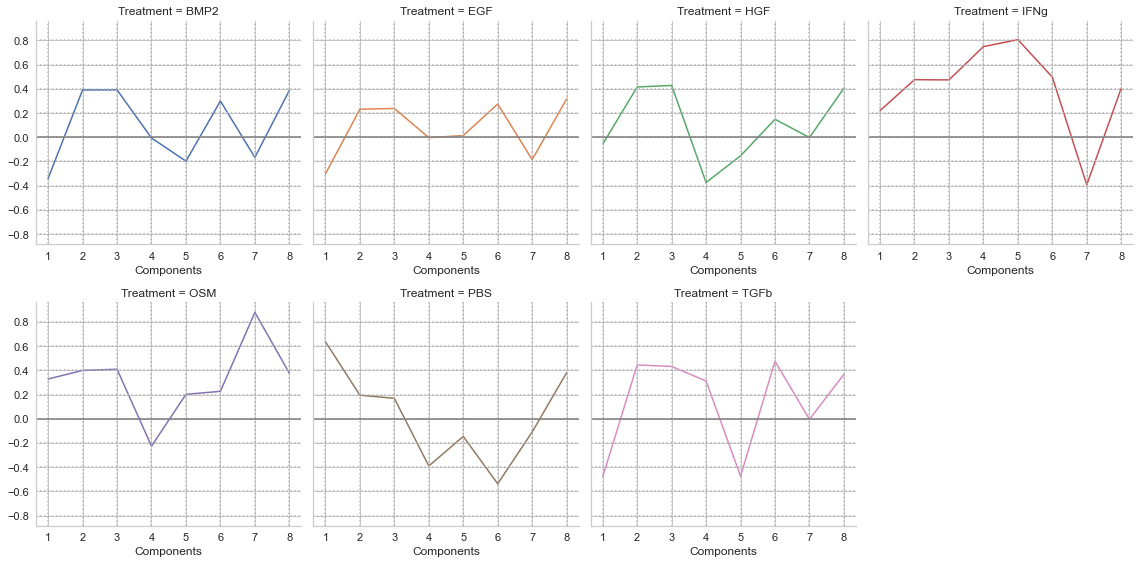

In [34]:
separate_treatmentPlot(comps[0], treatments)

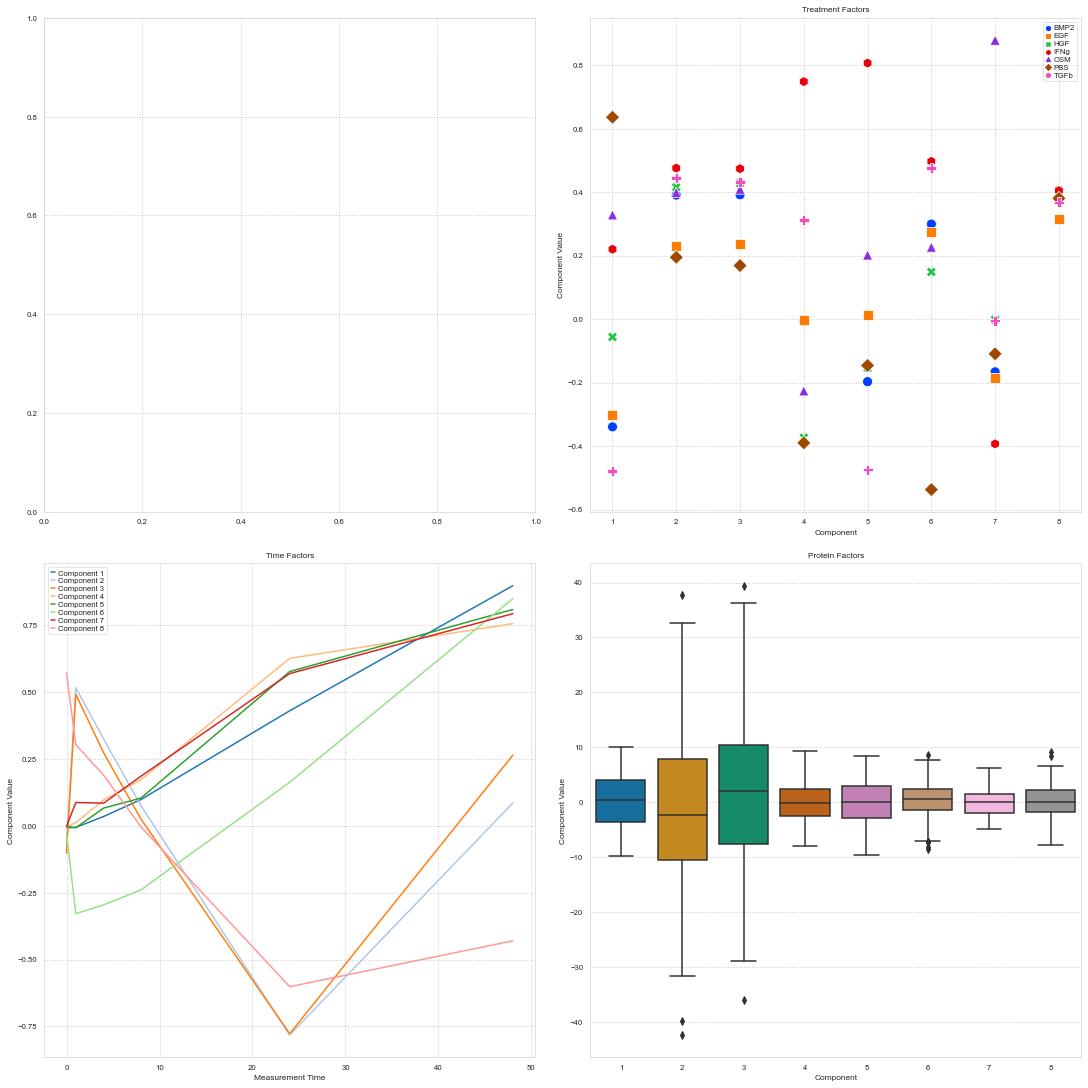

In [3]:
ax, f = getSetup((15, 15), (2, 2))
R2X_figure(ax[0], tensor_z)
treatmentPlot(ax[1], comps[0], treatments)
timePlot(ax[2], comps[1], times)
proteinBoxPlot(ax[3], comps[2])

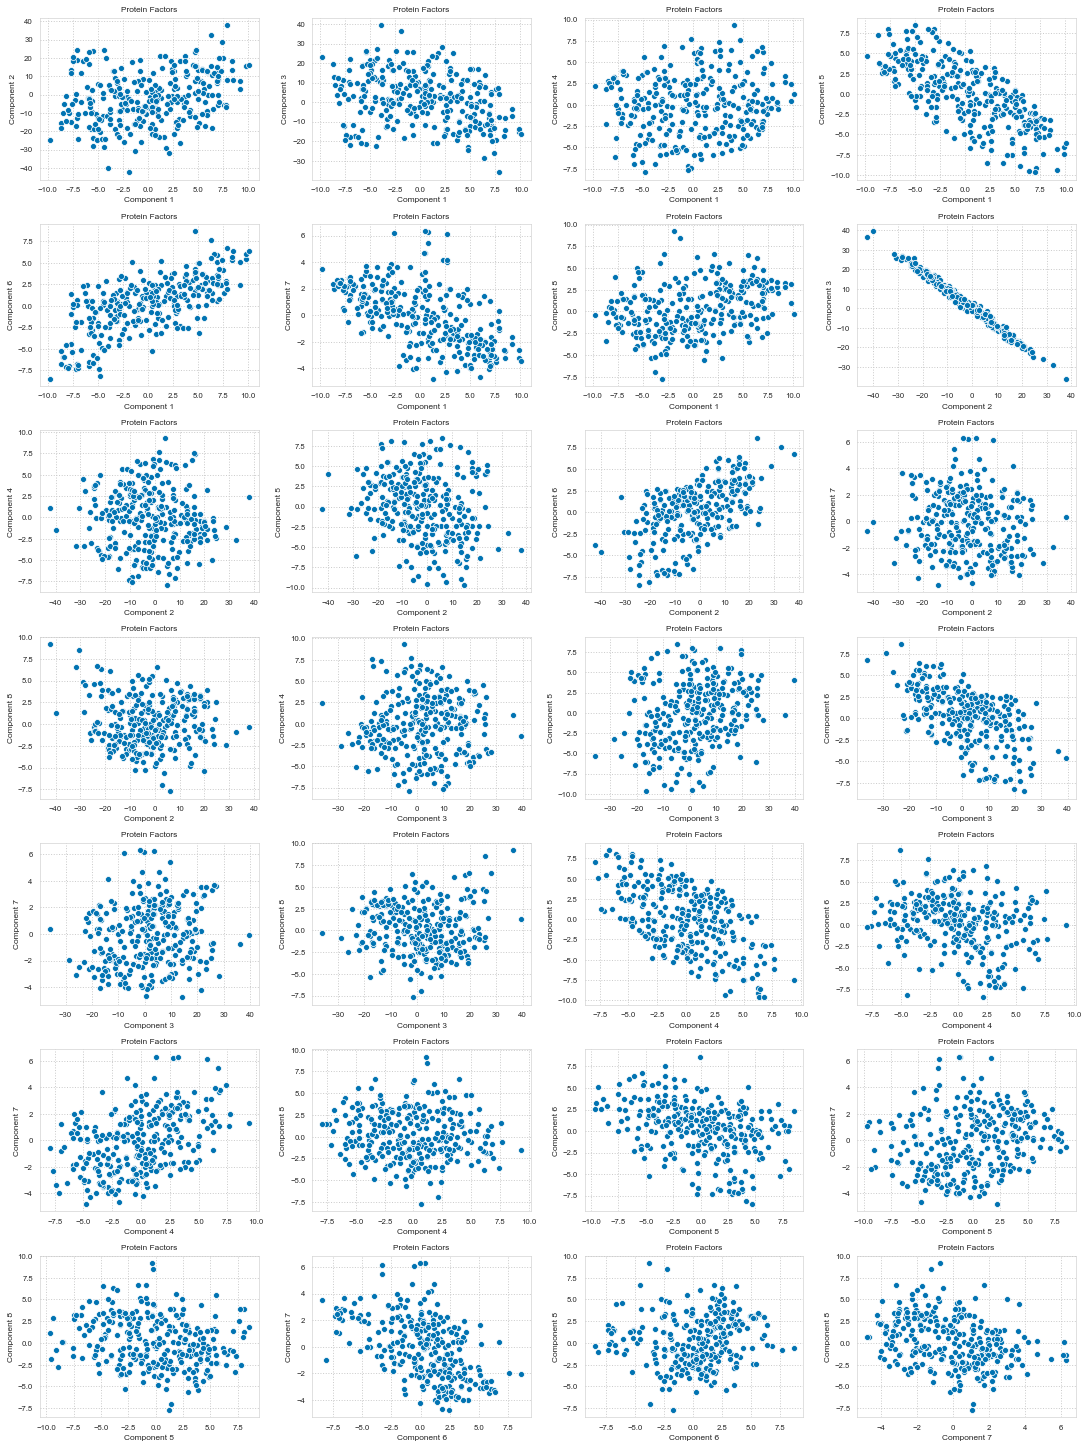

In [9]:
ax, f = getSetup((15, 20), (7, 4))
counter = 0
for i in range(8):
    for j in range(i + 1, 8):
        proteinScatterPlot(ax[counter], comps[2], i+1, j+1)
        counter += 1

## The following was for finding protein outliers and can be ignored

In [69]:
df = pd.DataFrame(comps[2])
from tfac.dataHelpers import importLINCSprotein

proteins = importLINCSprotein()
columns = proteins.columns[3:298]

df["Proteins"] = columns

Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
prots = {}
for i in range(df.columns.size - 1):
    print(np.round((Q1[i] - 1.5*IQR[i]), 2), np.round((Q3[i] + 1.5*IQR[i]), 2))
    positives = []
    negatives = []
    for row, col in df.iterrows():
        if (col[i] < (Q1[i] - 1.5 * IQR[i])):
            negatives.append((col[i], col["Proteins"]))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
        elif (col[i] > (Q3[i] + 1.5 * IQR[i])):
            positives.append((col[i], col['Proteins']))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
    print()
    negatives = sorted(negatives)[:5]
    positives = sorted(positives)[-5:]
    for tup in positives:
        print(tup[1])
    for tup in positives:
        print(np.round(tup[0], 2))
    print()
    for tup in negatives:
        print(tup[1])
    for tup in negatives:
        print(np.round(tup[0], 2))
    print()
display(prots)

-4.64 5.29

Bim-R-V
IRF-1-R-C
SOD2-R-V
EMA-M-C
HES1-R-V
5.77
6.16
7.93
10.11
10.53

S6_pS235_S236-R-V
Cyclin-B1-R-V
PLK1-R-C
PAI-1-M-V
Rb_pS807_S811-R-V
-16.26
-14.33
-13.64
-12.63
-11.61

-6.05 6.39

HER3-R-V
p21-R-V
MAPK_pT202_Y204-R-V
FAK_pY397-R-V
Akt_pS473-R-V
11.11
13.0
15.37
17.5
19.35

Myosin-IIa_pS1943-R-V
ACC_pS79-R-V
AMPKa_pT172-R-C
PAR-R-C
PLK1-R-C
-31.75
-26.4
-21.13
-16.73
-9.19

-24.62 18.78

MAPK_pT202_Y204-R-V
Akt_pS473-R-V
S6_pS240_S244-R-V
DUSP4-R-V
S6_pS235_S236-R-V
62.04
64.71
67.23
114.84
165.95

CDK1-R-C
PLK1-R-C
Cyclin-B1-R-V
Connexin-43-R-C
ACC_pS79-R-V
-41.03
-34.15
-34.12
-32.64
-28.43

-6.57 6.68

Myosin-IIa_pS1943-R-V
Rb_pS807_S811-R-V
PLK1-R-C
CDK1-R-C
Cyclin-B1-R-V
11.67
11.97
12.73
14.5
16.01

EMA-M-C
YAP-R-C
S6_pS235_S236-R-V
p21-R-V
HER3-R-V
-13.4
-13.16
-11.96
-11.91
-11.11

-7.72 9.69

ACC_pS79-R-V
HER2_pY1248-R-C
Wee1_pS642-R-C
Connexin-43-R-C
13.15
13.34
14.71
18.19

S6_pS235_S236-R-V
DUSP4-R-V
S6_pS240_S244-R-V
p70-S6K_pT389-R-V
Akt_pS473-R-V
-58.

{'AMPKa_pT172-R-C': 5,
 'Bim-R-V': 1,
 'CD171-M-V': 2,
 'CDK1-R-C': 6,
 'Chk2_pT68-R-C': 1,
 'Claudin-7-R-V': 1,
 'Cyclin-B1-R-V': 7,
 'DUSP4-R-V': 11,
 'EMA-M-C': 8,
 'FoxM1-R-V': 5,
 'HES1-R-V': 10,
 'IRF-1-R-C': 2,
 'p90RSK_pT573-R-C': 5,
 'PAI-1-M-V': 4,
 'PLK1-R-C': 7,
 'Rb_pS807_S811-R-V': 7,
 'S6-M-V': 9,
 'S6_pS235_S236-R-V': 11,
 'S6_pS240_S244-R-V': 10,
 'SOD2-R-V': 4,
 'Stat3_pY705-R-V': 3,
 'VEGFR-2-R-V': 1,
 'ACC_pS79-R-V': 5,
 'Akt_pS473-R-V': 11,
 'Akt_pT308-R-V': 9,
 'c-Myc-R-C': 9,
 'D-a-Tubulin-R-V': 1,
 'FAK_pY397-R-V': 6,
 'HER3-R-V': 2,
 'Histone-H3-R-V': 7,
 'HSP27_pS82-R-V': 3,
 'MAPK_pT202_Y204-R-V': 6,
 'Myosin-IIa_pS1943-R-V': 9,
 'p21-R-V': 3,
 'PAR-R-C': 3,
 'Smad3-R-V': 2,
 'TRIM25-R-C': 1,
 'U-Histone-H2B-R-C': 3,
 'YAP-R-C': 4,
 'C-Raf_pS338-R-V': 8,
 'Collagen-VI-R-V': 1,
 'Connexin-43-R-C': 9,
 'GSK-3a-b_pS21_S9-R-V': 5,
 'HER2_pY1248-R-C': 7,
 'Hif-1-alpha-M-C': 2,
 'Mcl-1-R-V': 10,
 'mTOR_pS2448-R-C': 4,
 'N-Ras-M-V': 5,
 'p70-S6K_pT389-R-V': 9,
 'Pdc

## The following was for finding more unique protein outliers and can be ignored

In [74]:
prots = {}
comp_prots = []
for i in range(df.columns.size - 1):
    comp_prot = []
    comp_prot.append((np.round((Q1[i] - 1.5*IQR[i]), 2), np.round((Q3[i] + 1.5*IQR[i]), 2)))
    positives = []
    negatives = []
    for row, col in df.iterrows():
        if (col[i] < (Q1[i] - 1.5 * IQR[i])):
            negatives.append((col[i], col["Proteins"]))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
        elif (col[i] > (Q3[i] + 1.5 * IQR[i])):
            positives.append((col[i], col['Proteins']))
            if col['Proteins'] not in prots:
                prots[col['Proteins']] = 1
            else:
                prots[col['Proteins']] += 1
    comp_prot.append(sorted(positives))
    comp_prot.append(sorted(negatives))
    comp_prots.append(comp_prot)
for comp in comp_prots:
    comp[1] = [tup for tup in comp[1] if prots[tup[1]] < 6]
    comp[2] = [tup for tup in comp[2] if prots[tup[1]] < 6]
for comp in comp_prots:
    print(comp[0])
    print()
    comp[1] = comp[1][-5:]
    comp[2] = comp[2][:5]
    for tup in comp[1]:
        print(tup[1])
    for tup in comp[1]:
        print(np.round(tup[0], 2))
    print()
    for tup in comp[2]:
        print(tup[1])
    for tup in comp[2]:
        print(np.round(tup[0], 2))
    print()
display(prots)

(-4.64, 5.29)

Claudin-7-R-V
Stat3_pY705-R-V
Bim-R-V
IRF-1-R-C
SOD2-R-V
5.49
5.74
5.77
6.16
7.93

PAI-1-M-V
CD171-M-V
Chk2_pT68-R-C
FoxM1-R-V
p90RSK_pT573-R-C
-12.63
-7.24
-6.68
-5.88
-5.73

(-6.05, 6.39)

Smad3-R-V
CD171-M-V
YAP-R-C
HER3-R-V
p21-R-V
8.12
8.56
11.02
11.11
13.0

ACC_pS79-R-V
AMPKa_pT172-R-C
PAR-R-C
HSP27_pS82-R-V
TRIM25-R-C
-26.4
-21.13
-16.73
-8.95
-7.55

(-24.62, 18.78)

N-Ras-M-V
PKC-b-II_pS660-R-V
GSK-3a-b_pS21_S9-R-V
Pdcd4-R-C
p90RSK_pT573-R-C
34.38
34.56
38.09
39.18
48.48

ACC_pS79-R-V
FoxM1-R-V
-28.43
-25.22

(-6.57, 6.68)

Gys_pS641-R-V
Caveolin-1-R-V
YAP_pS127-R-V
Axl-R-V
AMPKa_pT172-R-C
7.66
8.61
8.77
9.02
9.51

YAP-R-C
p21-R-V
HER3-R-V
Hif-1-alpha-M-C
NDRG1_pT346-R-V
-13.16
-11.91
-11.11
-10.22
-8.01

(-7.72, 9.69)

ACC_pS79-R-V
Wee1_pS642-R-C
13.15
14.71

p90RSK_pT573-R-C
Rictor_pT1135-R-V
Caveolin-1-R-V
mTOR_pS2448-R-C
GSK-3a-b_pS21_S9-R-V
-12.77
-12.65
-12.18
-10.6
-10.6

(-12.45, 12.2)

ACC1-R-C
AMPKa_pT172-R-C
FoxM1-R-V
12.36
14.67
19.99

Stat3_pY705-R-V

{'AMPKa_pT172-R-C': 5,
 'Bim-R-V': 1,
 'CD171-M-V': 2,
 'CDK1-R-C': 6,
 'Chk2_pT68-R-C': 1,
 'Claudin-7-R-V': 1,
 'Cyclin-B1-R-V': 7,
 'DUSP4-R-V': 11,
 'EMA-M-C': 8,
 'FoxM1-R-V': 5,
 'HES1-R-V': 10,
 'IRF-1-R-C': 2,
 'p90RSK_pT573-R-C': 5,
 'PAI-1-M-V': 4,
 'PLK1-R-C': 7,
 'Rb_pS807_S811-R-V': 7,
 'S6-M-V': 9,
 'S6_pS235_S236-R-V': 11,
 'S6_pS240_S244-R-V': 10,
 'SOD2-R-V': 4,
 'Stat3_pY705-R-V': 3,
 'VEGFR-2-R-V': 1,
 'ACC_pS79-R-V': 5,
 'Akt_pS473-R-V': 11,
 'Akt_pT308-R-V': 9,
 'c-Myc-R-C': 9,
 'D-a-Tubulin-R-V': 1,
 'FAK_pY397-R-V': 6,
 'HER3-R-V': 2,
 'Histone-H3-R-V': 7,
 'HSP27_pS82-R-V': 3,
 'MAPK_pT202_Y204-R-V': 6,
 'Myosin-IIa_pS1943-R-V': 9,
 'p21-R-V': 3,
 'PAR-R-C': 3,
 'Smad3-R-V': 2,
 'TRIM25-R-C': 1,
 'U-Histone-H2B-R-C': 3,
 'YAP-R-C': 4,
 'C-Raf_pS338-R-V': 8,
 'Collagen-VI-R-V': 1,
 'Connexin-43-R-C': 9,
 'GSK-3a-b_pS21_S9-R-V': 5,
 'HER2_pY1248-R-C': 7,
 'Hif-1-alpha-M-C': 2,
 'Mcl-1-R-V': 10,
 'mTOR_pS2448-R-C': 4,
 'N-Ras-M-V': 5,
 'p70-S6K_pT389-R-V': 9,
 'Pdc